<a href="https://colab.research.google.com/github/aaronjojo98/Fulhaus/blob/main/Fulhaus1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
!pip install split-folders
import numpy as np
import pandas as pd
import os
import glob
import io
import seaborn as sns
from xgboost import XGBRegressor
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from collections import Counter
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from PIL import Image
from google.colab import drive
import zipfile
import splitfolders 
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.models as models
import torch.optim as optim
import torchvision
from torchvision import transforms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
#unziping images
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/drive/MyDrive/Dataset') #Extracts the files into the Dataset folder
zip_ref.close()

In [314]:
# Splitting data into training and test data (70% and 30% respectively)
splitfolders.ratio("/content/drive/MyDrive/Dataset/Data for test", output="/content/drive/MyDrive/Traintest", seed=42, ratio=(.7, 0,.3), group_prefix=None)

Copying files: 300 files [00:10, 27.94 files/s]


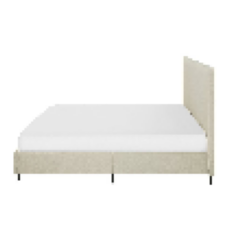

(100, 100, 3)


In [315]:
train = "/content/drive/MyDrive/Traintest/train"
test = "/content/drive/MyDrive/Traintest/test"

img = load_img(train + "/Bed/ALBI BED.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
x = img_to_array(img)
print(x.shape)

In [316]:
# Building CNN model 
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(3)) 
model.add(Activation("softmax"))

#Compiling the CNN model
model.compile(loss = "categorical_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])

#Model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 activation_48 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_49 (Activation)  (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                

In [317]:
#Normalizing all image data
train_scale = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_scale = ImageDataGenerator(rescale= 1./255)

train_norm = train_scale.flow_from_directory(
directory = train,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_norm = test_scale.flow_from_directory(
directory = test,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 210 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [318]:
#Training Model
print("Training the CNN Model")
nnn = model.fit(train_norm,epochs = 10)

Training the CNN Model
Epoch 1/10
4/4 [==============================] - 26s 4s/step - loss: 1.5193 - accuracy: 0.3476
Epoch 2/10
4/4 [==============================] - 17s 4s/step - loss: 1.0991 - accuracy: 0.4571
Epoch 3/10
4/4 [==============================] - 17s 4s/step - loss: 0.7386 - accuracy: 0.7381
Epoch 4/10
4/4 [==============================] - 17s 4s/step - loss: 0.8764 - accuracy: 0.6429
Epoch 5/10
4/4 [==============================] - 19s 5s/step - loss: 0.6365 - accuracy: 0.7143
Epoch 6/10
4/4 [==============================] - 17s 4s/step - loss: 0.4530 - accuracy: 0.7905
Epoch 7/10
4/4 [==============================] - 17s 4s/step - loss: 0.7655 - accuracy: 0.7048
Epoch 8/10
4/4 [==============================] - 17s 4s/step - loss: 0.4214 - accuracy: 0.8524
Epoch 9/10
4/4 [==============================] - 17s 4s/step - loss: 0.5880 - accuracy: 0.7714
Epoch 10/10
4/4 [==============================] - 16s 4s/step - loss: 0.3571 - accuracy: 0.8667


In [319]:
#Evaluating the CNN Model on test data
print("Evaluating model on test data: ")
print(model.evaluate(test_norm))

Evaluating model on test data: 


2/2 [==============================] - 7s 3s/step - loss: 0.4773 - accuracy: 0.8222
[0.47729921340942383, 0.8222222328186035]


In [320]:
#Saving Model
model.save('/content/model.h5', save_format="h5")

In [321]:
#installing flask api dependencies
!pip install flask-ngrok
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [322]:
import flask
from flask import Flask, render_template, request, flash, redirect, url_for
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok
from werkzeug.utils import secure_filename
import os
import config

from keras.models import load_model 
from keras.preprocessing import image
import numpy as np

In [323]:
image_folder = '/content/static/images/'
app = Flask(__name__)
run_with_ngrok(app)
app.config["UPLOAD_FOLDER"] = image_folder

model = load_model('model.h5')

In [324]:
@app.route('/', methods=['GET'])
def home():
  return render_template('/content/templates/index.html')

In [325]:
@app.route('/', methods=['POST'])
def predict():
  # predicting images
  imagefile = request.files['imagefile']
  image_path = '/content/static/images/' + imagefile.filename 
  imagefile.save(image_path)

  img = image.load_img(image_path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  pic = os.path.join(app.config['UPLOAD_FOLDER'], imagefile.filename)
  
  if classes=='Chair':
    return render_template('index.html', user_image=pic, prediction_text='{} is the image of Chair'.format(imagefile.filename))
  elif classes=='Bed':
    return render_template('index.html', user_image=pic, prediction_text='{} is the image of Bed'.format(imagefile.filename))
  else:
    return render_template('index.html', user_image=pic, prediction_text='{} is the image of Sofa'.format(imagefile.filename))


In [326]:
# app = Flask(__name__)
# run_with_ngrok(app)
if __name__=='__main__':
  app.run()
  # public_url = ngrok.connect(port = '8050')
  # public_url

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-130:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connection.py", line 158, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 597, in urlopen
    httplib_response = self._make_request(conn, method, url,
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File